In [42]:
import pandas as pd
import seaborn as sns
from firebase import firebase
from matplotlib import pyplot as plt
import data_patterns

In [13]:
fb = firebase.FirebaseApplication('https://classiot-3ae5a-default-rtdb.firebaseio.com/', None)
bridges = fb.get('/Bridges', None)


In [17]:
df = pd.DataFrame.from_dict(bridges)
df.head()

,BridgeId,Latitude,Longitude,Time,humidity,vehicleWeight
0,1,-1.184088,27.047712,2022-10-01,45.600858,345.742595
1,1,-1.184088,27.047712,2022-10-02,46.600858,345.742595
2,1,-1.184088,27.047712,2022-10-03,47.600858,345.742595
3,1,-1.184088,27.047712,2022-10-04,48.600858,345.742595
4,1,-1.184088,27.047712,2022-10-05,45.600858,345.742595


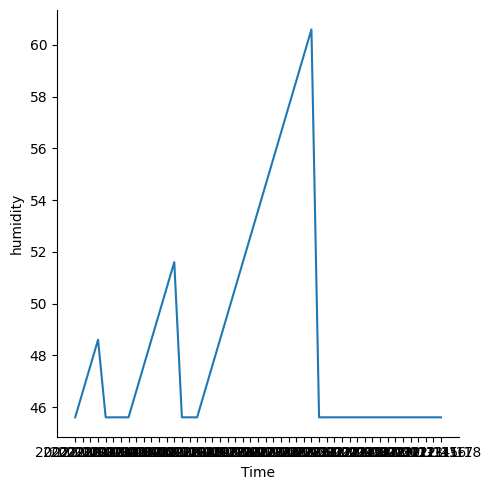

In [25]:
"""Humidity Changes vs. Time"""

sns.relplot(data=df, x="Time", y="humidity", kind="line")


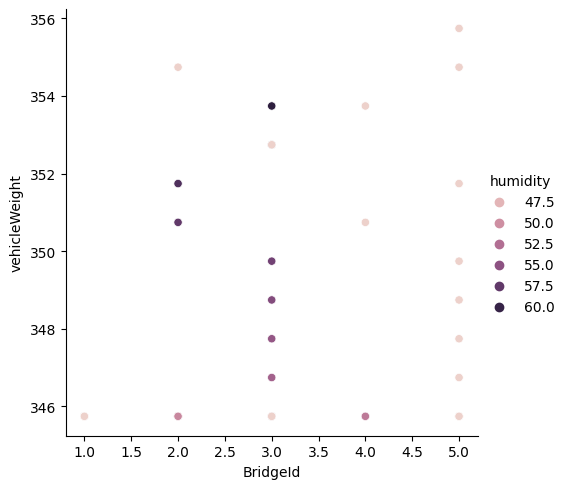

In [34]:
sns.relplot(
    data=df,
    x="BridgeId", y="vehicleWeight", hue="humidity",
)

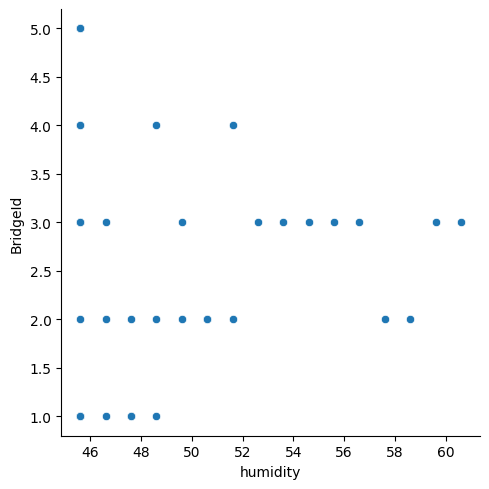

In [36]:
sns.relplot(data=df, x="humidity", y="BridgeId")

<AxesSubplot: xlabel='BridgeId', ylabel='vehicleWeight'>

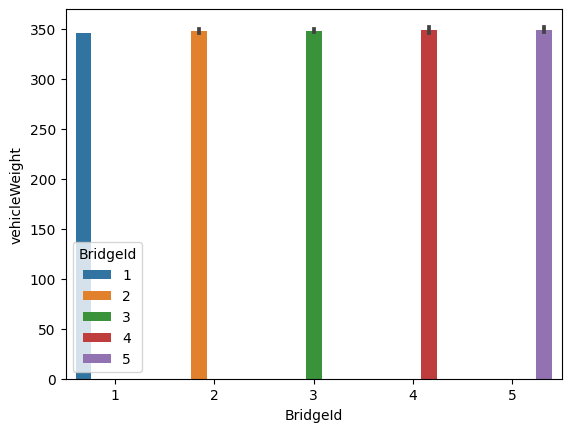

In [40]:
sns.barplot(data=df, x="BridgeId", y="vehicleWeight", hue="BridgeId")

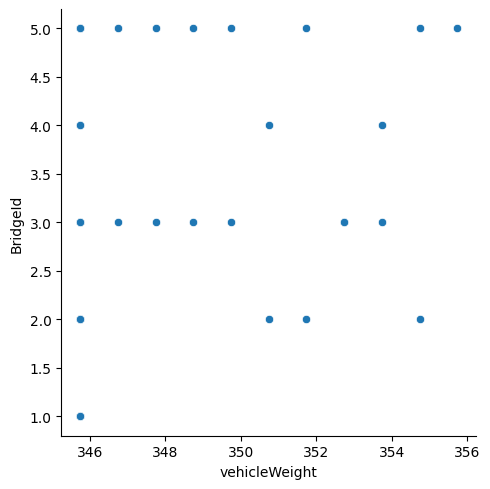

In [43]:
sns.relplot(data=df, x="vehicleWeight", y="BridgeId")

In [65]:
""" Learning the data-patterns  """


# creating a pattern mixer object
miner = data_patterns.PatternMiner(df)

df_patterns = miner.find({'name'      : 'Closely Equal',
                          'pattern'   : '<',
                          'parameters': {"min_confidence": 0.5,
                                         "min_support"   : 1,
                                         "decimal" : 2}})

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 669.50it/s]
/home/izampa/.local/lib/python3.10/site-packages/data_patterns/data_patterns.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_patterns = df_patterns.append(


In [66]:
df_results = miner.analyze(df)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 137.84it/s]


In [67]:
df_results.head()

,result_type,pattern_id,cluster,support,exceptions,confidence,pattern_def,P values,Q values
index,,,,,,,,,
0,True,Closely Equal,0,49,0,1.0,"({""BridgeId""} < {""Longitude""})",1.0,27.047712
1,True,Closely Equal,0,49,0,1.0,"({""BridgeId""} < {""Longitude""})",1.0,27.047712
2,True,Closely Equal,0,49,0,1.0,"({""BridgeId""} < {""Longitude""})",1.0,27.047712
3,True,Closely Equal,0,49,0,1.0,"({""BridgeId""} < {""Longitude""})",1.0,27.047712
4,True,Closely Equal,0,49,0,1.0,"({""BridgeId""} < {""Longitude""})",1.0,27.047712
